Regression Plots with Pandas and Numpy

Are London winters getting warmer. We are going to check whether the temperatures in London are rising over time. It’s not obvious from the raw data but by plotting a regression line over that data we will be better able to see the trend.

Thanks to __Alan Jones__ that i could come up with my first data science experiment

In [2]:
#import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#Next, we download the data to out local directory

!wget -O /resources/data/londonweather.csv https://raw.githubusercontent.com/alanjones2/dataviz/master/londonweather.csv



--2020-08-18 14:57:11--  https://raw.githubusercontent.com/alanjones2/dataviz/master/londonweather.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.124.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.124.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20887 (20K) [text/plain]
Saving to: ‘/resources/data/londonweather.csv’

/resources/data/lon 100%[===================>]  20.40K  --.-KB/s    in 0.005s  

2020-08-18 14:57:11 (3.92 MB/s) - ‘/resources/data/londonweather.csv’ saved [20887/20887]



We read the CSV file into a Pandas DataFrame and this is what it looks like — a table containing monthly data that records the maximum and minimum temperatures, the rainfall and the number of hours of sunshine, starting in 1957 and ending part way through 2019.

In [4]:
weather = pd.read_csv("/resources/data/londonweather.csv")
weather

,Year,Month,Tmax,Tmin,Rain,Sun
0,1957,1,8.7,2.7,39.5,53.0
1,1957,2,9.0,2.9,69.8,64.9
2,1957,3,13.9,5.7,25.4,96.7
3,1957,4,14.2,5.2,5.7,169.6
4,1957,5,16.2,6.5,21.3,195.0
...,...,...,...,...,...,...
743,2018,12,10.7,5.2,60.6,40.3
744,2019,1,7.6,2.0,33.2,56.4
745,2019,2,12.4,3.3,34.2,120.2
746,2019,3,13.1,5.8,49.6,119.0


# Question is whether winters were getting warmer


I’m going to filter the data to give me only the data for the month of December when the coldest temperatures are normally recorded. The code below applies a query to the weather dataframe which returns only the rows where the Month is equal to 12 (i.e.Dec) and creates a new dataframe called Dec from the result. Next, we insert a new column called Yr which numbers the rows from 0 to the length of the table.

In [5]:
dec = weather.query("Month == 12")
dec.insert(0,"Yr",range(0,len(dec)))
dec

,Yr,Year,Month,Tmax,Tmin,Rain,Sun
11,0,1957,12,7.6,1.0,42.1,40.8
23,1,1958,12,8.0,2.7,85.1,29.6
35,2,1959,12,9.3,3.0,75.7,30.2
47,3,1960,12,6.9,2.1,56.5,44.5
59,4,1961,12,6.8,0.2,88.6,46.2
...,...,...,...,...,...,...,...
695,57,2014,12,9.2,3.0,37.8,71.6
707,58,2015,12,13.7,8.9,39.4,35.0
719,59,2016,12,10.2,3.4,10.4,55.1
731,60,2017,12,8.7,2.9,81.2,43.8


#  Now we can plot the minimum temperatures for Dec since 1957.

<AxesSubplot:xlabel='Yr'>

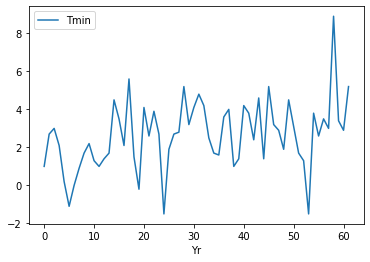

In [6]:
dec.plot(y='Tmin',x='Yr')

There is a lot of variation there and high temperatures are not limited to recent years. But there does seem to be a trend, temperatures do seem to be rising a little, over time.

We can try and make this a bit more obvious by doing a linear regression where we attempt to find a straight line graph that represents the trend in the rise in temperature. To do this we use the polyfit function from Numpy. Polyfit does a least squares polynomial fit over the data that it is given. We want a linear regression over the data in columns Yr and Tmax so we pass these as parameters. The final parameter is the degree of the polynomial. For linear regression the degree is 1.

In [7]:
d = np.polyfit(dec['Yr'],dec['Tmin'],1)
f = np.poly1d(d)

We now use the function f to produce our linear regression data and inserting that into a new column called Treg.

In [8]:
dec.insert(7,'Treg', f(dec['Yr']))



In [9]:
# Now dec has new column Treg
dec

,Yr,Year,Month,Tmax,Tmin,Rain,Sun,Treg
11,0,1957,12,7.6,1.0,42.1,40.8,1.548541
23,1,1958,12,8.0,2.7,85.1,29.6,1.584284
35,2,1959,12,9.3,3.0,75.7,30.2,1.620027
47,3,1960,12,6.9,2.1,56.5,44.5,1.655770
59,4,1961,12,6.8,0.2,88.6,46.2,1.691514
...,...,...,...,...,...,...,...,...
695,57,2014,12,9.2,3.0,37.8,71.6,3.585906
707,58,2015,12,13.7,8.9,39.4,35.0,3.621649
719,59,2016,12,10.2,3.4,10.4,55.1,3.657392
731,60,2017,12,8.7,2.9,81.2,43.8,3.693135


Next, we create a line plot of Yr against Tmax (the wiggly plot we saw above) and another of Yr against Treg which will be our straight line regression plot. We combine the two plot by assigning the first plot to the variable ax and then passing that to the second plot as an additional axis.

<AxesSubplot:xlabel='Year'>

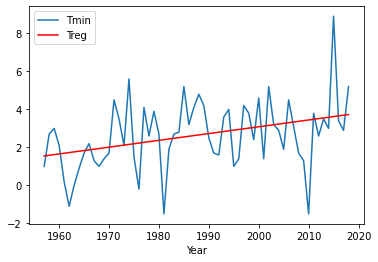

In [10]:
ax = dec.plot(x = 'Year',y='Tmin')
dec.plot(x='Year', y='Treg',color='Red',ax=ax)

#   We can now see much more clearly the upward trend of winter temperature over the years.

And here is the same thing done with a scatter chart.

<AxesSubplot:xlabel='Year', ylabel='Tmin'>

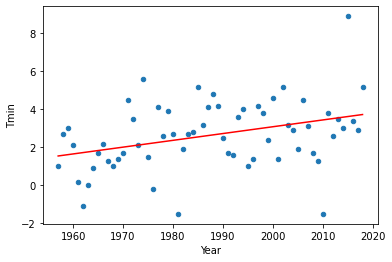

In [11]:
ax=dec.plot.scatter(x='Year', y='Tmin')
dec.plot(x='Year',y='Treg',color='Red',legend=False,ax=ax)